In [1]:
%%time

%run dataframes.ipynb

Wall time: 1min 11s


In [2]:
%run funkcje.ipynb

In [3]:
plt.rcParams["figure.figsize"] = (8,6)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [4]:
#Ilość całkowitych przypadków w czasie dla wybranego powiatu

# which_district = "warszawa"
# fig, ax = plt.subplots()
# plt.plot_date(infections[infections.district == which_district]["date"], infections[infections.district == which_district]["infected_total"])
# plt.xlabel('Data')
# #plt.xticks([])
# plt.ylabel('Liczba zakażeń')
# every_nth = 3
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
# plt.title("Warszawa")

In [5]:
#Ilość całkowitych śmierci w czasie dla wybranego powiatu

# which_district = "warszawa"
# fig, ax = plt.subplots()
# plt.plot_date(deaths[deaths.district == which_district]["date"], deaths[deaths.district == which_district]["dead_total"])
# plt.xlabel('Data')
# plt.ylabel('Liczba śmierci')
# every_nth = 3
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
# plt.title("Warszawa")

In [6]:
#Ilość nowych przypadków w czasie dla wybranego powiatu

# which_district = "warszawa"
# fig, ax = plt.subplots()
# plt.plot_date(infections[infections.district == which_district]["date"], infections[infections.district == which_district]["new_infected"])
# plt.xlabel('Data')
# #plt.xticks([])
# plt.ylabel('Liczba zakażeń')
# every_nth = 3
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)
# plt.title("Warszawa")

In [7]:
#Wykres liczby całkowitych przypadków od populacji dla wybranej daty

# x = infections2.loc[infections2['date'] == '2021-09-01', 'population']
# y = infections2.loc[infections2['date'] == '2021-09-01', 'infected_total']

# plt.plot(x, y, 'bo')
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zakażeń')
# plt.title("01.09.2021r.")

In [8]:
#Wykres liczby całkowitych śmierci od populacji dla wybranej daty

# x = deaths.loc[deaths['date'] == '2020-09-01', 'population']
# y = deaths.loc[deaths['date'] == '2020-09-01', 'dead_total']

# plt.plot(x, y, 'bo')
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba śmierci')
# plt.title("01.09.2020r.")

In [9]:
#Wykres całkowitej liczby przypadków od populacji dla pierwszego dnia pandemii

# x = infections.loc[infections['pandemic_day'] == 0, 'population']
# y = infections.loc[infections['pandemic_day'] == 0, 'infected_total']

# plt.plot(x, y, 'bo')
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zakażeń')

# #tutaj widać, że przez wybrakowane dane na początku, niektóre powiaty w pierwszy dzień mają dużo zakażonych 
# #(zweryfikowałem, tak jest w danych)

In [10]:
#Wykres całkowitej liczby śmierci od populacji dla pierwszego dnia pandemii

# x = deaths.loc[deaths['pandemic_day'] == 0, 'population']
# y = deaths.loc[deaths['pandemic_day'] == 0, 'dead_total']

# plt.plot(x, y, 'bo')
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zgonów')

# #tutaj widać, że przez wybrakowane dane na początku, niektóre powiaty w pierwszy dzień mają dużo zakażonych 
# #(zweryfikowałem, tak jest w danych)
#

In [11]:
# print(deaths)
#print_full(population)
# print_full(infections.loc[infections['pandemic_day'] == 200, 'population'])
# print_full(deaths.loc[deaths['population'] == 1790658])

a = 0.0016277726429443473
b = 1434.603308408121
R^2 = 0.02561220454427882
p = 0.001959545744013357


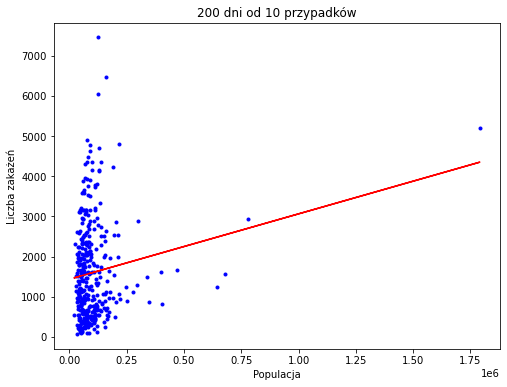

In [53]:
#Wykres całkowitej liczby przypadków od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 200
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Populacja", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.0014426178287627752
b = 54.7095040751521
R^2 = 0.9002857938778714
p = 2.5157647911165005e-191


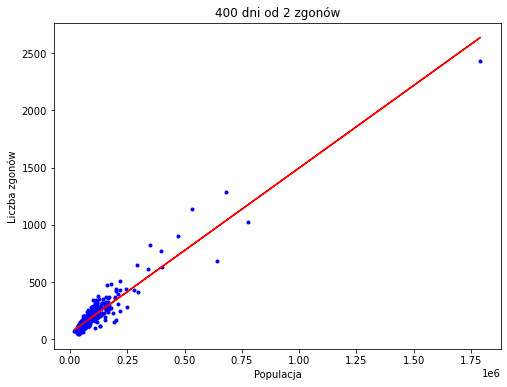

In [58]:
#Wykres całkowitej liczby śmierci od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'population']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Populacja", "Liczba zgonów")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

#dlaczego wykres tak, sprawdzić warszawę

a = 1.1218483563099364
b = -1.7721727586840896
R^2 = 0.8912120842015129
p = 7.800643799557536e-180


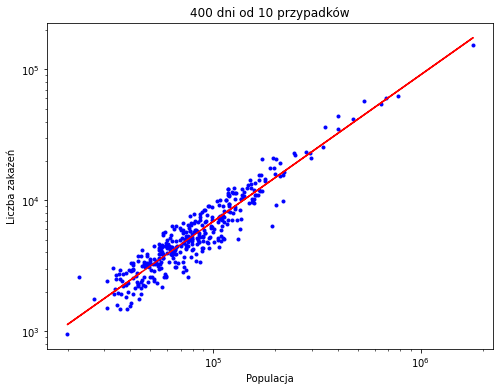

In [62]:
#Wykres całkowitej liczby przypadków od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Populacja", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

Text(0.5, 1.0, 'Warszawa')

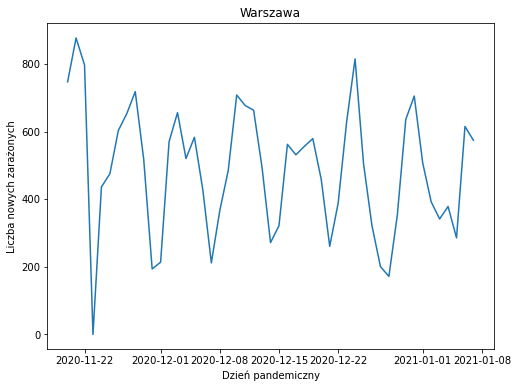

In [16]:
# #print_full(infections.loc[infections['district'] == 'warszawa'])
# #print_full(infections.loc[infections['pandemic_day'] == 1])


# x = infections.loc[(infections['district'] == 'warszawa') & (infections['pandemic_day'] > 250) & (infections['pandemic_day'] < 300), 'date']
# y = infections.loc[(infections['district'] == 'warszawa') & (infections['pandemic_day'] > 250) & (infections['pandemic_day'] < 300) , 'new_infected']
# plt.plot(x, y)
# plt.xlabel('Dzień pandemiczny')
# plt.ylabel('Liczba nowych zarażonych')
# plt.title("Warszawa")

In [17]:
# dti = pd.date_range("2020-11-23", periods=7, freq="7D")
# # print(dti)

In [64]:
# print_full(deaths.loc[deaths['district'] == "warszawa"])

            date     province  district  dead_total  population  area_ha  \
88784 2020-03-04  mazowieckie  warszawa         0.0     1790658    51724   
88785 2020-03-05  mazowieckie  warszawa         0.0     1790658    51724   
88786 2020-03-06  mazowieckie  warszawa         0.0     1790658    51724   
88787 2020-03-07  mazowieckie  warszawa         0.0     1790658    51724   
88788 2020-03-08  mazowieckie  warszawa         0.0     1790658    51724   
88789 2020-03-09  mazowieckie  warszawa         0.0     1790658    51724   
88790 2020-03-10  mazowieckie  warszawa         0.0     1790658    51724   
88791 2020-03-11  mazowieckie  warszawa         0.0     1790658    51724   
88792 2020-03-12  mazowieckie  warszawa         0.0     1790658    51724   
88793 2020-03-13  mazowieckie  warszawa         0.0     1790658    51724   
88794 2020-03-14  mazowieckie  warszawa         0.0     1790658    51724   
88795 2020-03-15  mazowieckie  warszawa         0.0     1790658    51724   
88796 2020-0

Text(0.5, 1.0, 'Warszawa')

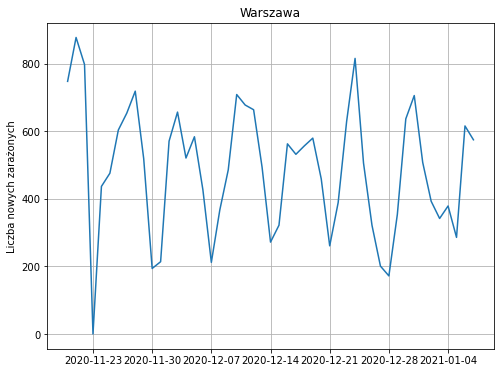

In [18]:
x = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-19') & (infections['date'] < '2021-01-08'), 'date']
y = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-19') & (infections['date'] < '2021-01-08') , 'new_infected']
plt.plot(x, y)
plt.xlabel('')
plt.ylabel('Liczba nowych zarażonych')
plt.xticks(dti)
plt.grid(visible = True)
plt.title("Warszawa")

In [19]:
# x = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-19') & (infections['date'] < '2021-01-08'), 'date']
# y = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-19') & (infections['date'] < '2021-01-08') , 'new_infected']

# plt.plot(x, y)
# plt.xlabel('Data')
# plt.ylabel('Liczba nowych zarażonych')
# plt.xticks(dti)
# plt.grid(visible = True)
# plt.title("Warszawa")





In [20]:
# # tutaj znajduję impostorów

# print_full(infections.loc[(infections['infected_total'] < 800) & (infections['pandemic_day'] > 350) & (infections['pandemic_day'] < 400)])

Empty DataFrame
Columns: [date, province, district, infected_total, population, area_ha, density_ppl_per_ha, new_infected, pandemic_day]
Index: []


In [21]:
# # tutaj badam impostorów

# print_full(infections.loc[(infections['district'] == "bielski") & (infections['province'] == "śląskie") & (infections['pandemic_day'] > 350) & (infections['pandemic_day'] < 400)])

             date province district  infected_total  population  area_ha  \
229845 2021-03-12  śląskie  bielski          9096.0      165960    45864   
229846 2021-03-13  śląskie  bielski          9266.0      165960    45864   
229847 2021-03-14  śląskie  bielski          9423.0      165960    45864   
229848 2021-03-15  śląskie  bielski          9531.0      165960    45864   
229849 2021-03-16  śląskie  bielski          9643.0      165960    45864   
229850 2021-03-17  śląskie  bielski          9874.0      165960    45864   
229851 2021-03-18  śląskie  bielski         10106.0      165960    45864   
229852 2021-03-19  śląskie  bielski         10364.0      165960    45864   
229853 2021-03-20  śląskie  bielski         10523.0      165960    45864   
229854 2021-03-21  śląskie  bielski         10749.0      165960    45864   
229855 2021-03-22  śląskie  bielski         10900.0      165960    45864   
229856 2021-03-23  śląskie  bielski         10989.0      165960    45864   
229857 2021-

a = 0.8448377344347899
b = -1.9219834206273676
R^2 = 0.8140690161878997
p = 3.671129375948655e-140


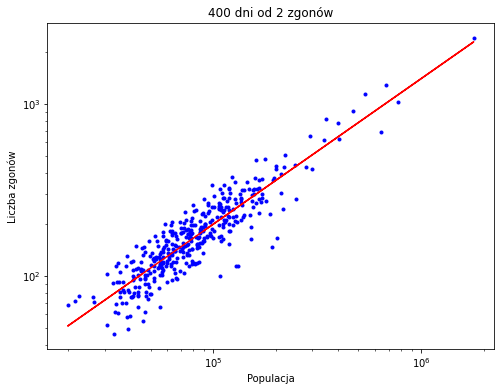

In [68]:
#Wykres całkowitej liczby śmierci od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'population']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Populacja", "Liczba zgonów")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 856.7760807231938
b = 4381.186840164927
R^2 = 0.27062977547721334
p = 4.0997417136271526e-27


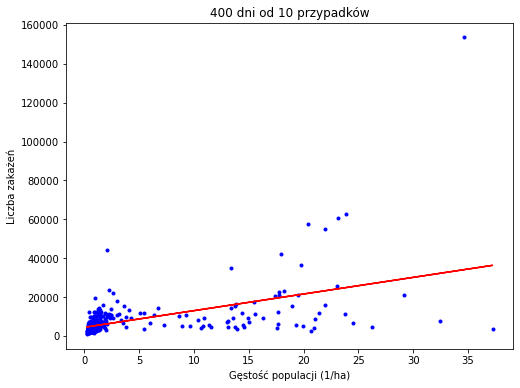

In [74]:
#Wykres całkowitej liczby przypadków od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 14.833281801155916
b = 145.79668883570278
R^2 = 0.2821623452373898
p = 4.717971099474644e-29


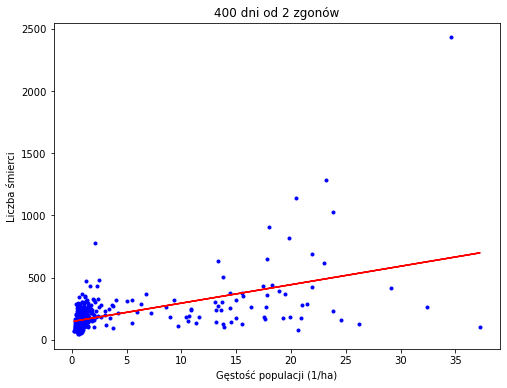

In [80]:
#Wykres całkowitej liczby śmierci od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, r, p, std_err = fit_n_plot_linlin_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Gęstość populacji (1/ha)", "Liczba śmierci")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.31387573317511713
b = 3.7327864013827035
R^2 = 0.3361043307318139
p = 6.8530220519508705e-34


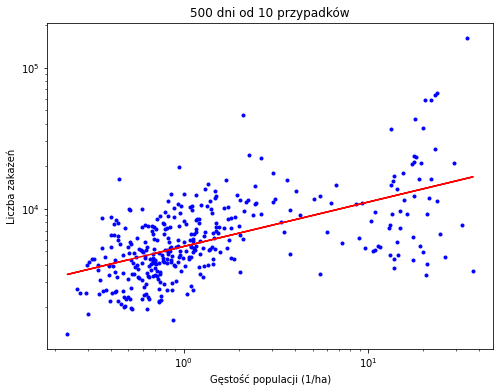

In [85]:
#Wykres całkowitej liczby przypadków od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 500
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = 0.2516754465016672
b = 2.1877979640658656
R^2 = 0.31994157215918934
p = 1.618870526721575e-33


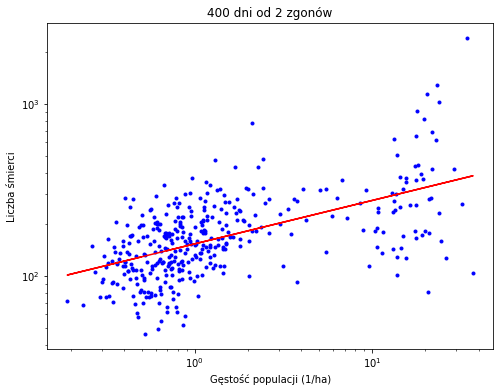

In [91]:
#Wykres całkowitej liczby śmierci od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Gęstość populacji (1/ha)", "Liczba śmierci")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = -0.2846827146810413
b = -1.8054804367538868
R^2 = 0.12548258733931947
p = 1.9392375802612657e-12


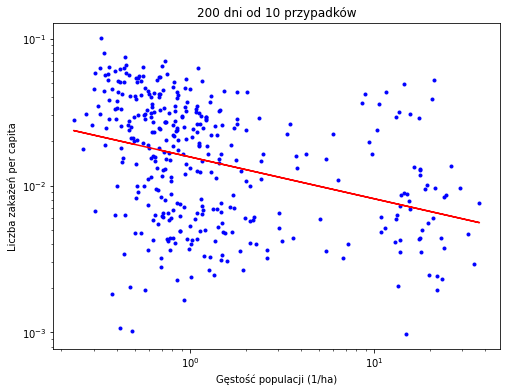

In [93]:
#Wykres całkowitej liczby zakażeń per capita od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 200
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
infectss = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']
popul = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infectss / popul

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń per capita")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

a = -0.21187945123614615
b = -2.868450755754455
R^2 = 0.16395932114891568
p = 7.132755790891202e-16


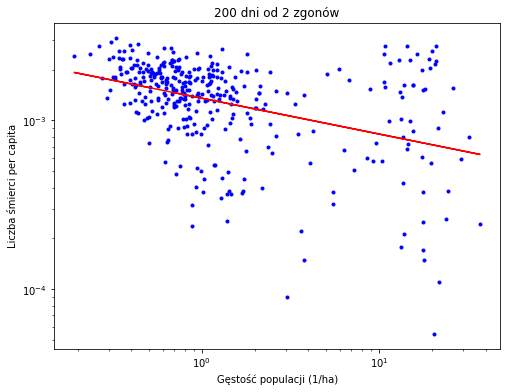

In [32]:
#Wykres całkowitej liczby śmierci per capita od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 200
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
deathss = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']
popul = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'population']
y = deathss / popul

a, b, r, p, std_err = fit_n_plot_loglog_scipy(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Gęstość populacji (1/ha)", "Liczba śmierci per capita")
print("a = "+str(a))
print("b = "+str(b))
print("R^2 = "+str(r*r))
print("p = "+str(p))

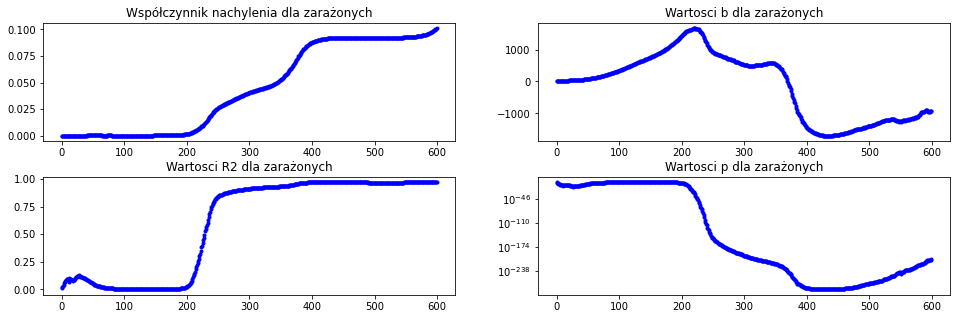

In [33]:
#Wykres nachylenia prostej dla przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od populacji) (lin-lin)

#max days_num = 695
days_num = 600
nachylenia = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_linlin_scipy(x, y)
    nachylenia.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

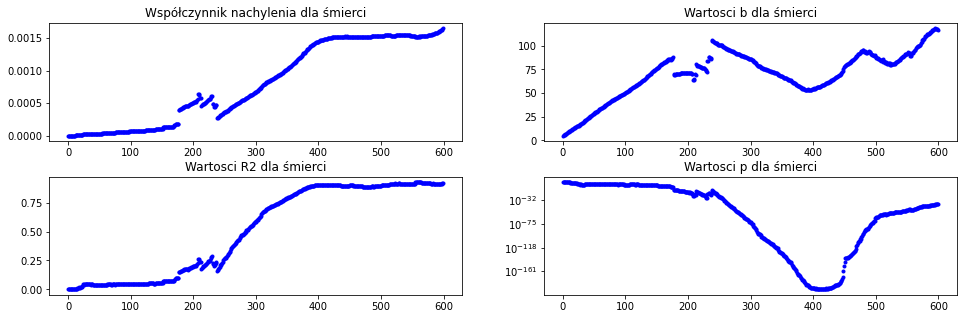

In [34]:
#Wykres nachylenia prostej dla śmierci i w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od populacji) (lin-lin)

#max days_num = 691
days_num = 600
nachylenia = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_linlin_scipy(x, y)
    nachylenia.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

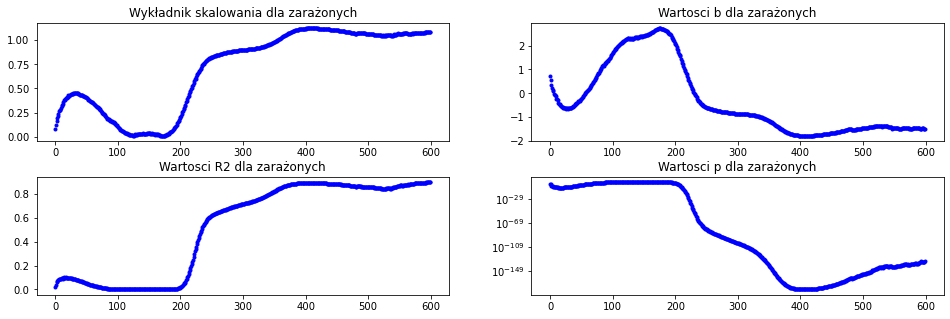

In [96]:
#Wykres wykładnika skalowania dla przypadków i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od populacji) (log-log)

days_num = 600
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

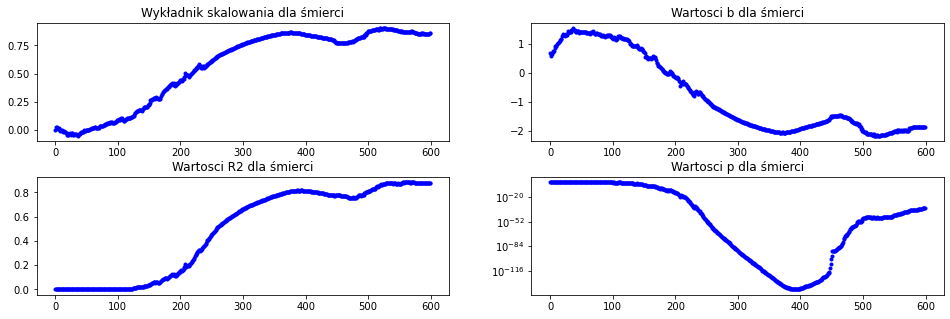

In [97]:
#Wykres wykładnika skalowania dla śmierci i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od populacji) (log-log)

days_num = 600
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

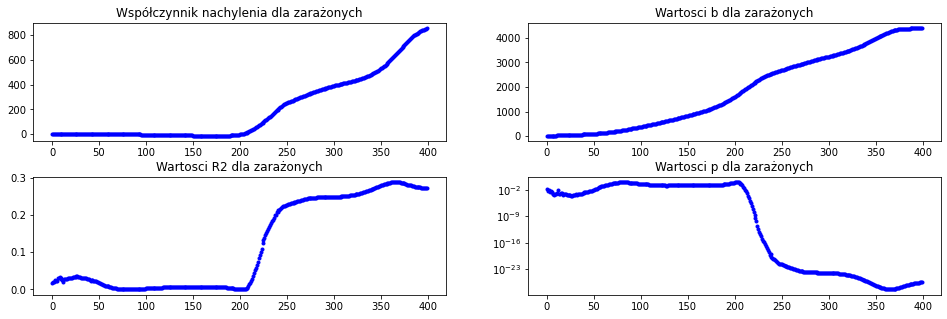

In [100]:
#Wykres nachylenia prostej dla przypadków i w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (lin-lin)

days_num = 400
nachylenia = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_linlin_scipy(x, y)
    nachylenia.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

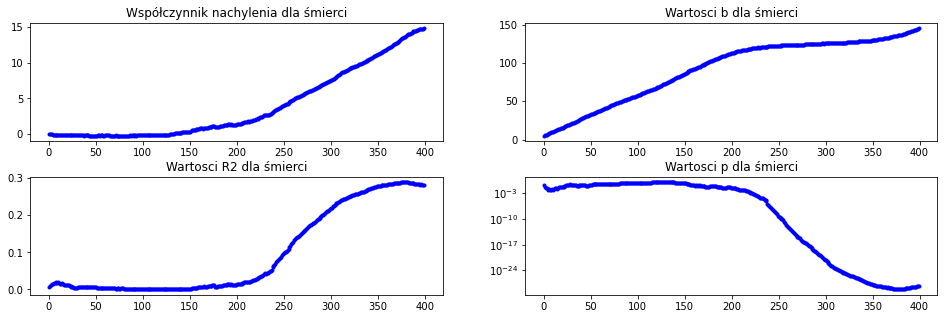

In [101]:
#Wykres wykładnika skalowania dla śmierci i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (lin-lin)

days_num = 400
nachylenia = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_linlin_scipy(x, y)
    nachylenia.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

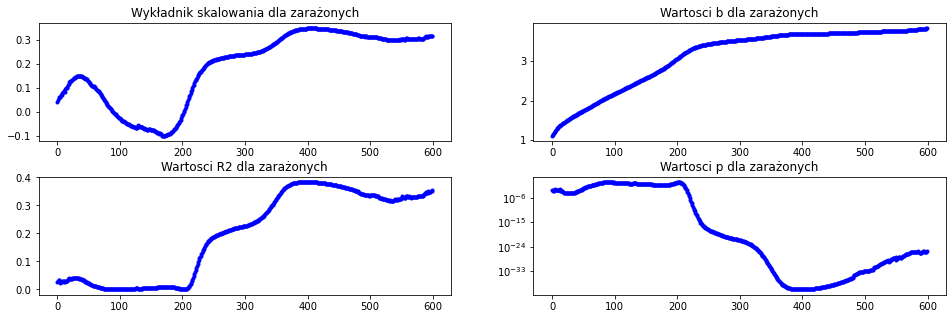

In [104]:
#Wykres wykładnika skalowania dla przypadków i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (log-log)

days_num = 600
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')

ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")

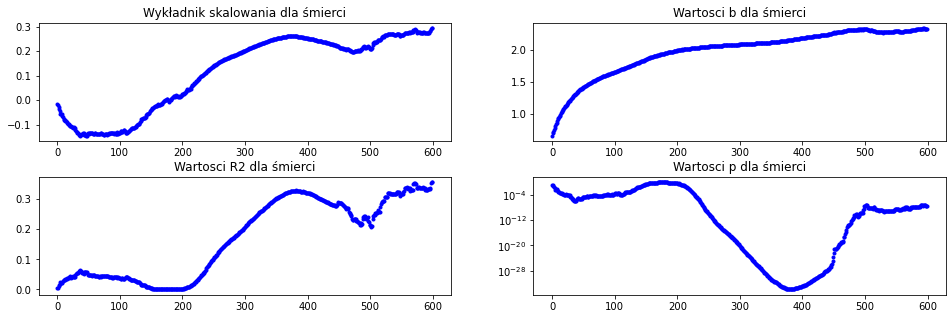

In [103]:
#Wykres wykładnika skalowania dla śmierci i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (log-log)

days_num = 600
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_total']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_scipy(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')

ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")

In [39]:
#Wykres całkowitej liczby przypadków per capita od populacji dla wybranego dnia pandemii

# x = infections.loc[infections['pandemic_day'] == 200, 'population']
# y = infections.loc[infections['pandemic_day'] == 200, 'infected_total']

# y = y / x
# plt.plot(x, y, 'bo')
# plt.title("200 dni od 2 przypadków")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zakażeń per capita')

In [40]:
#Wykres całkowitej liczby śmierci per capita od populacji dla pierwszego dnia pandemii

# x = deaths.loc[deaths['pandemic_day'] == 200, 'population']
# y = deaths.loc[deaths['pandemic_day'] == 200, 'dead_total']

# y = y / x
# plt.plot(x, y, 'bo')
# plt.title("200 dni od 2 przypadków")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zgonów per capita')